In [1]:
import pandas as pd

df = pd.read_csv("CarPrice_Assignment.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Extract Car Brand
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Fix typos in CarBrand
df['CarBrand'] = df['CarBrand'].replace({
    'vw': 'volkswagen', 'vokswagen': 'volkswagen',
    'porcshce': 'porsche', 'toyouta': 'toyota',
    'maxda': 'mazda', 'alfa-romero': 'alfa-romeo'
})

# Lowercase & strip all object columns
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].apply(lambda x: x.str.strip().str.lower())

In [5]:
# Convert 'doornumber' and 'cylindernumber' to numeric
door_map = {'two': 2, 'four': 4}
cylinder_map = {
    'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'eight': 8, 'twelve': 12
}
df['doornumber'] = df['doornumber'].map(door_map)
df['cylindernumber'] = df['cylindernumber'].map(cylinder_map)

In [6]:
# Drop car_ID and CarName
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [7]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)
print(f"New shape after encoding: {df.shape}")
# Split features and target
X = df.drop('price', axis=1)
y = df['price']

New shape after encoding: (205, 60)


In [8]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")


Linear Regression
R² Score: 0.8951
MSE: 8283565.72
MAE: 1942.07

Decision Tree
R² Score: 0.8977
MSE: 8076925.85
MAE: 2033.07

Random Forest
R² Score: 0.9578
MSE: 3331320.66
MAE: 1286.57

Gradient Boosting
R² Score: 0.9288
MSE: 5621238.04
MAE: 1668.86

SVR
R² Score: -0.1020
MSE: 86994606.63
MAE: 5707.13


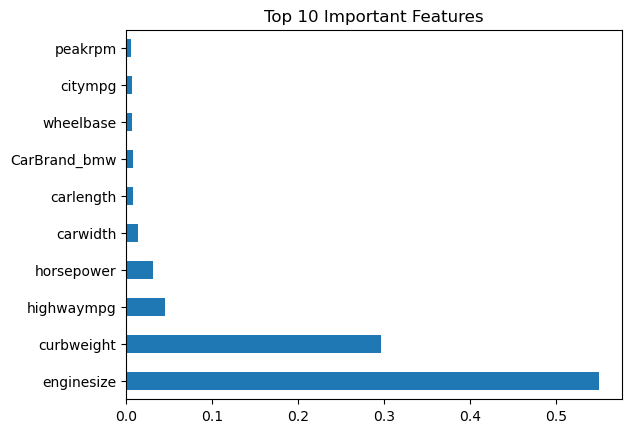

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance from Random Forest
rf_model = models['Random Forest']
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', title='Top 10 Important Features')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate tuned model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\nAfter Hyperparameter Tuning (Random Forest):")
print(f"Best R² Score: {r2_score(y_test, y_pred_best):.4f}")
print(f"Best MSE: {mean_squared_error(y_test, y_pred_best):.2f}")
print(f"Best MAE: {mean_absolute_error(y_test, y_pred_best):.2f}")


After Hyperparameter Tuning (Random Forest):
Best R² Score: 0.9585
Best MSE: 3276781.32
Best MAE: 1265.62
